In [4]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from lib.Trend import TrendData, extract_trend

In [6]:
# READ THE DATA 
df = pd.read_csv("data/TSLA-d.csv", index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
# I. Range

In [8]:
'''
I.A: Capture the Range 

The absolute values of the Open, High, and Low won't be useful to us. The daily range as a percentage of 
something (the Open, or previous day's Close for example) could be useful though, so we should extract 
what's useful, and get rid of what's not. 
'''
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.head()

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.392632
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.276076
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.226000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.190870
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.208500


In [ ]:
'''
I.A.1: Alternate Way

The single line of code above that extracts the daily range is possible thanks to the non-native Python 
library pandas. In case you aren't 
accustomed to using pandas (and just to demonstrate what that line actually does) 
it would be as if I had looped through the data and done this: 
'''
df['Range'] = 0 #add new column 
for i in range(len(df)): 
    df['Range'][i] = (df["High"][i] - df["Low"][i]) / df["Open"][i]
df.head()

In [ ]:
'''
I.B: Plotting the Data

Just to show what the Range column looks like, I will plot it. 
'''
plt.plot(df['Range'])

TODO: verify that there is no trend 
'''
Just a few comments here; you can visually see a few things: 
- there is no discernable strong trend 
- the distribution is noticeably skewed right, with extreme positive outliers 
- the range of the data is not neatly between 0 and 1

The lack of trend is a good thing, we want that to feed into the model. The right-skew and the scale, we will 
fix in later steps. 
'''

<AxesSubplot:ylabel='Density'>

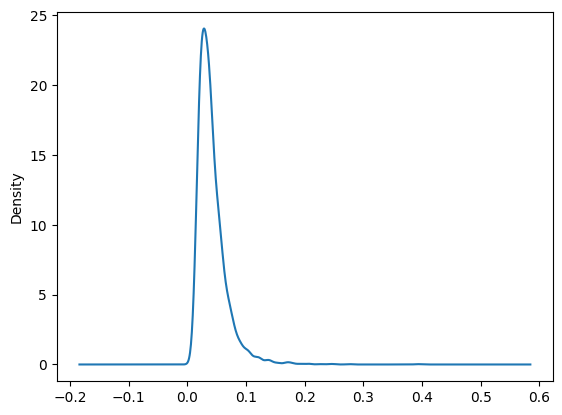

In [9]:
'''
I.C: Plot Distribution

Here I've plotted the distribution to better show the skewness of the data, though you can see it plainly 
enough in the previous plot. Removing outliers should make the data more balanced, so I will do that in a later 
step. 
'''
df['Range'].plot(kind='kde')

In [10]:
'''
I.D: Remove Extra Columns

Now that we've extracted the daily range from the Open, High, and Low columns, we don't need those anymore, 
so I'll just remove them. The information that we needed is now in the Range column. 
'''
# remove extra columns 
df.pop("Open")
df.pop("High")
df.pop("Low")
df.head()

,Close,Adj Close,Volume,Range
Date,,,,
2010-06-29,1.592667,1.592667,281494500,0.392632
2010-06-30,1.588667,1.588667,257806500,0.276076
2010-07-01,1.464000,1.464000,123282000,0.226000
2010-07-02,1.280000,1.280000,77097000,0.190870
2010-07-06,1.074000,1.074000,103003500,0.208500
